In [ ]:
%%capture
pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_df = pd.read_csv('/content/drive/MyDrive/AML/traffic/M/df_x.csv')
# X_df = pd.read_csv('/content/drive/MyDrive/traffic/M/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML/traffic/M/df_y.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/traffic/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
a=Y_df['unique_id'].unique()
a.size

862

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,0,-0.711224,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 02:00:00,1,-0.643331,-0.413043,0.166667,-0.500000,-0.00137
2,2016-07-01 02:00:00,2,-0.925668,-0.413043,0.166667,-0.500000,-0.00137
3,2016-07-01 02:00:00,3,-1.182531,-0.413043,0.166667,-0.500000,-0.00137
4,2016-07-01 02:00:00,4,-0.569992,-0.413043,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
15122923,2018-07-02 01:00:00,857,-0.311380,-0.456522,-0.500000,-0.466667,-0.00137
15122924,2018-07-02 01:00:00,858,-2.129480,-0.456522,-0.500000,-0.466667,-0.00137
15122925,2018-07-02 01:00:00,859,-1.582374,-0.456522,-0.500000,-0.466667,-0.00137
15122926,2018-07-02 01:00:00,860,-0.555770,-0.456522,-0.500000,-0.466667,-0.00137


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
# filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

Y_df=filtered_df
Y_df

<ipython-input-9-9b593517d244>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])


,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df.shape

(17544, 7)

## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17448,:]
Y_test_df = Y_df.iloc[17448:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17448,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,17449,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,17450,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,17451,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,17452,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 96
model = NHITS(h=horizon, input_size=24,
               max_steps=3,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.053    Total estimated model pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=3` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-1.473700
OT,1,-1.405294
OT,2,-0.936502
OT,3,-0.997401
OT,4,-1.082623
...,...,...
OT,91,-0.430874
OT,92,-0.652738
OT,93,-0.776496


<Axes: xlabel='ds'>

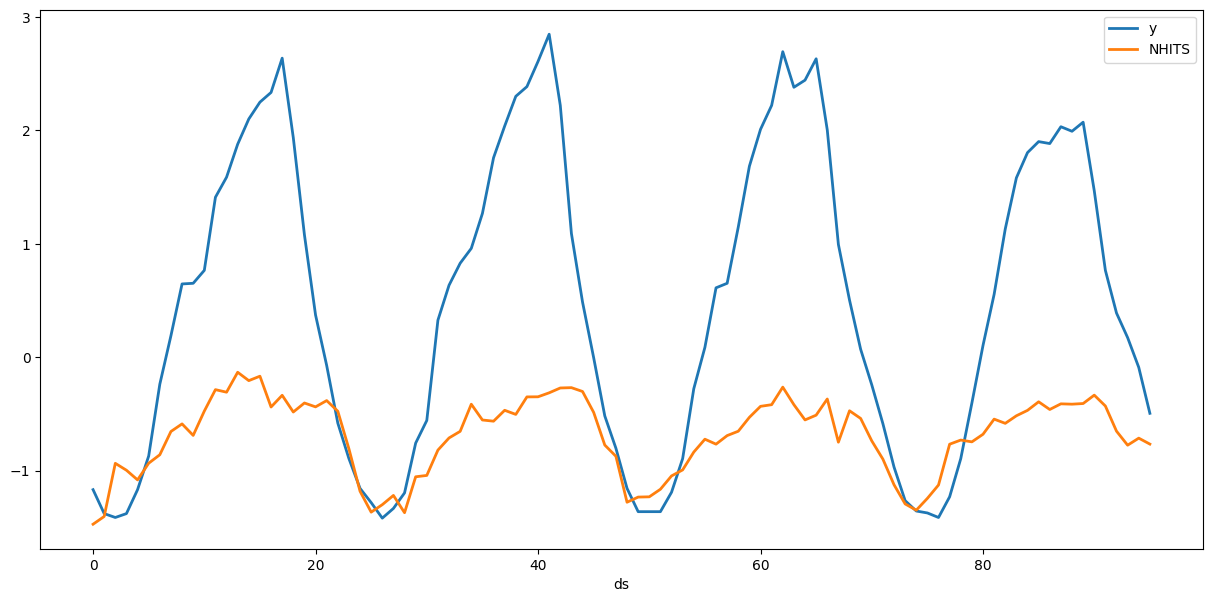

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-1.473700
1,-1.405294
2,-0.936502
3,-0.997401
4,-1.082623
...,...
91,-0.430874
92,-0.652738
93,-0.776496


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'N-Hits MAE: {mae_nhits:.3f}')
print(f'N-Hits MSE: {mse_nhits:.3f}')

N-Beats MAE: 1.231
N-Beats MSE: 2.517


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17352,:]
Y_test_df = Y_df.iloc[17352:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17352,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
1,17353,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
2,17354,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
3,17355,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
4,17356,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
188,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
189,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
190,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
1,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
2,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
3,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
4,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
188,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
189,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
190,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 192
model = NHITS(h=horizon, input_size=24,
               max_steps=3,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.6 M 
-----------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.397    Total estimated model pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=3` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.627402
OT,1,-0.555317
OT,2,-0.481914
OT,3,-0.449014
OT,4,-0.104858
...,...,...
OT,187,0.288690
OT,188,0.031160
OT,189,0.069247


<Axes: xlabel='ds'>

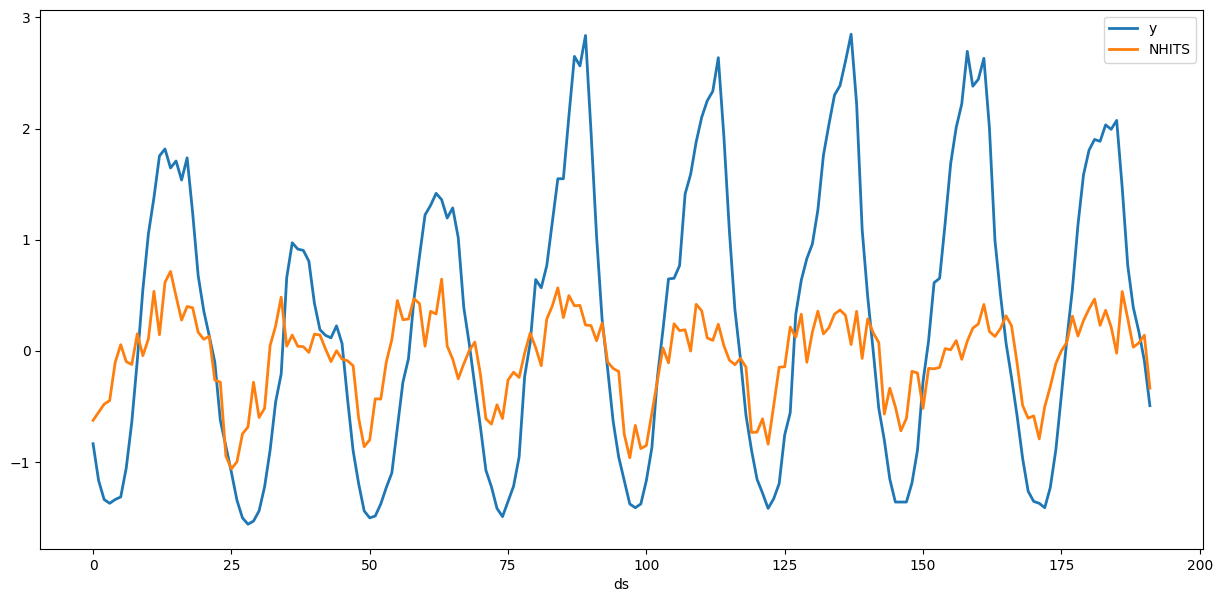

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.627402
1,-0.555317
2,-0.481914
3,-0.449014
4,-0.104858
...,...
187,0.288690
188,0.031160
189,0.069247


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 0.873
Nhits MSE: 1.149


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17208,:]
Y_test_df = Y_df.iloc[17208:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17208,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,17209,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,17210,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,17211,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,17212,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
331,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...
331,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 336
model = NHITS(h=horizon, input_size=24,
               max_steps=3,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.914    Total estimated model pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=3` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.618285
OT,1,-0.363345
OT,2,-0.570364
OT,3,-0.597201
OT,4,-0.435946
...,...,...
OT,331,0.179610
OT,332,-0.004900
OT,333,0.132576


<Axes: xlabel='ds'>

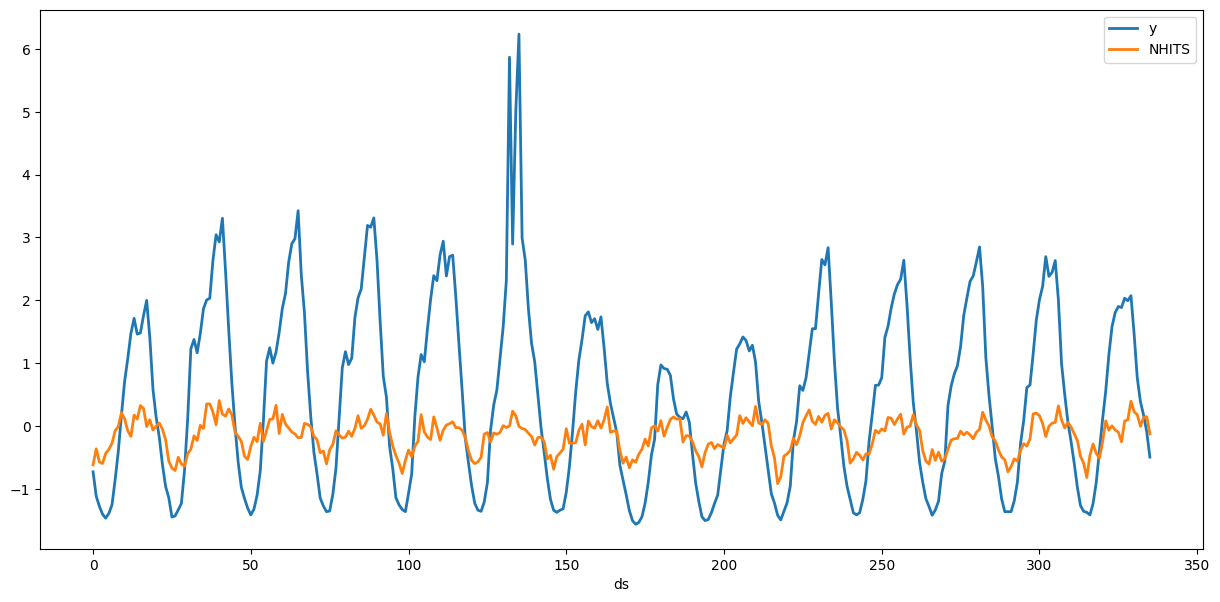

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.618285
1,-0.363345
2,-0.570364
3,-0.597201
4,-0.435946
...,...
331,0.179610
332,-0.004900
333,0.132576


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 1.130
Nhits MSE: 2.076


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:16824,:]
Y_test_df = Y_df.iloc[16824:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,16824,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,16825,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,16826,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,16827,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,16828,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
715,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...
715,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [ ]:
horizon = 720
model = NHITS(h=horizon, input_size=24,
               max_steps=3,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.1 M 
-----------------------------------------------
3.1 M     Trainable params
0         Non-trainable params
3.1 M     Total params
12.293    Total estimated model pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=3` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-1.046939
OT,1,-0.954601
OT,2,-0.948934
OT,3,-0.816360
OT,4,-0.987195
...,...,...
OT,715,-0.694333
OT,716,-0.810089
OT,717,-0.692548


<Axes: xlabel='ds'>

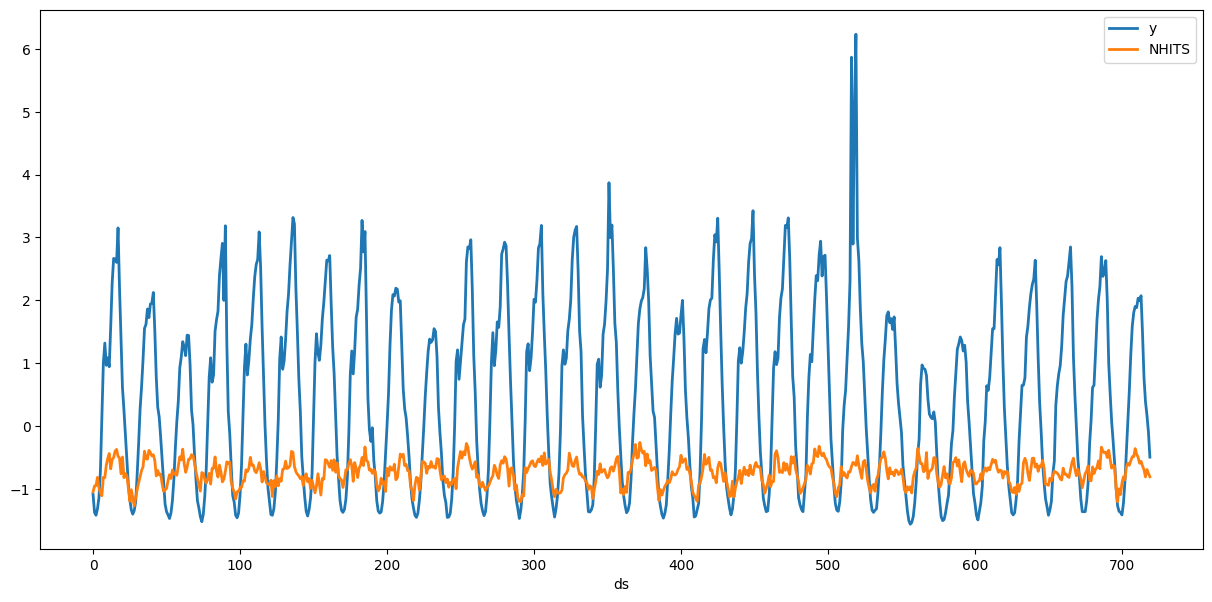

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-1.046939
1,-0.954601
2,-0.948934
3,-0.816360
4,-0.987195
...,...
715,-0.694333
716,-0.810089
717,-0.692548


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 1.419
Nhits MSE: 3.345
